In [1]:
import os
from glob import glob
import warnings
import json
import math

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [47]:
#read simulated hail data
hgtm_csv = '/home/meso/Insync/onedrive/sync/papers/hail-xsec_paper/hgtm-output/SimHailData.csv'
hgtm_df = pd.read_csv(hgtm_csv)
#all ignore
hgtm_size = hgtm_df['dmax_mm']
hgtm_id = hgtm_df['id']
ignore_list = [2,10,11]#[7,35,39] #reduce number of samples to match observation (select to preserve bin count). numbers start from one
new_list = []
for i, size in enumerate(hgtm_size):
    if hgtm_id[i] not in ignore_list:
        new_list.append(size)
hgtm_size = new_list

In [48]:
obs_csv = '/home/meso/Insync/onedrive/sync/papers/hail-xsec_paper/obs-output/obs_measurements.csv'
obs_df = pd.read_csv(obs_csv)
obs_size = obs_df['dmax_mm']
obs_id = obs_df['id']
ignore_list = [24,26,29] # numbers start from one
new_list = []
for i, size in enumerate(obs_size):    
    if obs_id[i] not in ignore_list:
        new_list.append(size)
obs_size = new_list

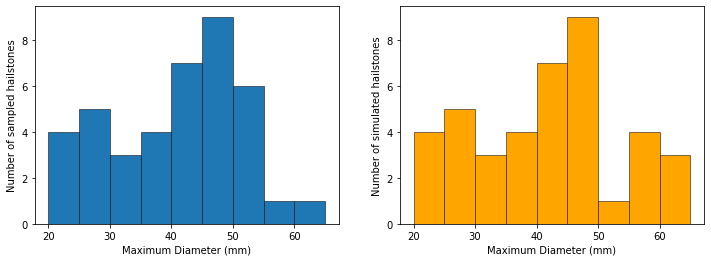

In [49]:
#should really read this from a csv file
fig = plt.figure(figsize=[12,4], facecolor='w')
plt.subplot(121)
plt.hist(obs_size, bins=[20,25,30,35,40,45,50,55,60,65], edgecolor='black', linewidth=0.5)
plt.ylabel('Number of sampled hailstones')
plt.xlabel('Maximum Diameter (mm)')

plt.subplot(122)
plt.hist(hgtm_size, bins=[20,25,30,35,40,45,50,55,60,65], color='orange', edgecolor='black', linewidth=0.5)
plt.ylabel('Number of simulated hailstones')
plt.xlabel('Maximum Diameter (mm)')

plt.savefig('fig07.png', dpi=150)

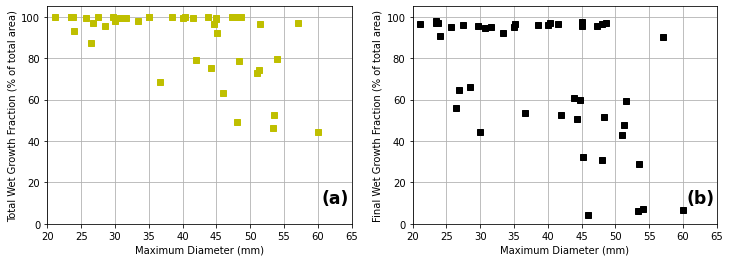

In [50]:
fig = plt.figure(figsize=[12,4], facecolor='w')

plt.subplot(121)
plt.plot(df['dmax_mm'], 100-(hgtm_df['dry_growth_area_perc']), 'ys')
plt.xlabel('Maximum Diameter (mm)')
plt.ylabel('Total Wet Growth Fraction (% of total area)')
plt.xlim([20, 65])
plt.ylim([0, 105])
plt.grid()
plt.text(60.5, 10, '(a)', size='xx-large', weight='bold')

plt.subplot(122)
plt.plot(df['dmax_mm'], hgtm_df['final_wet_growth_area_perc'], 'ks')
plt.xlabel('Maximum Diameter (mm)')
plt.ylabel('Final Wet Growth Fraction (% of total area)')
plt.xlim([20,65])
plt.ylim([0, 105])
plt.text(60.5, 10, '(b)', size='xx-large', weight='bold')
plt.grid()

plt.savefig('fig08.png', dpi=150)

In [9]:
print(np.mean(100-(df['dry_growth_area_perc'])))

89.03782093023256
